In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [7]:

df  = pd.read_csv('weight-height.csv')

df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [8]:
X = df[['Height']].values
y_true= df[['Weight']].values


In [16]:
def line(x, w=0,b=0):
    return w*x+b

def mean_squared_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

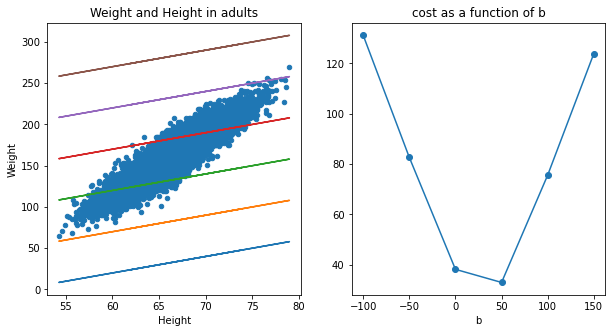

In [17]:
plt.figure(figsize=(10,5))
axl=plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in adults', ax=axl)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(X,w=2,b=b)
    mse=mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
X.shape

(10000, 1)

In [21]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [24]:
model.fit(X,y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 1ms/step - loss: 820.6619
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 546.9326
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 511.5504
Epoch 4/40
313/313 [==============================] - 0s 1ms/step - loss: 469.7475
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 440.2614
Epoch 6/40
313/313 [==============================] - 0s 1ms/step - loss: 378.8894
Epoch 7/40
313/313 [==============================] - 0s 1ms/step - loss: 343.5271
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 310.8810
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 292.9833
Epoch 10/40
313/313 [==============================] - 1s 2ms/step - loss: 275.8155
Epoch 11/40
313/313 [==============================] - 1s 2ms/step - loss: 243.2735
Epoch 12/40
313/313 [==============================] - 0s 2ms/step - loss: 230.9630
E

In [25]:
y_pred=model.predict(X)

In [26]:
y_pred

array([[224.01538],
       [184.75012],
       [226.05493],
       ...,
       [146.65689],
       [186.70624],
       [131.74377]], dtype=float32)

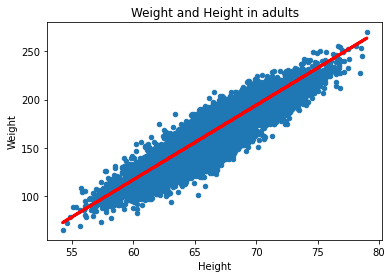

In [27]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in adults')
plt.plot(X, y_pred, color='red',linewidth=3)

In [28]:
w, b=model.get_weights()

In [29]:
w

array([[7.7521124]], dtype=float32)

In [30]:
b

array([-348.45496], dtype=float32)

In [33]:
model.predict([[50]])

array([[39.150665]], dtype=float32)